# 데이터 분석

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Dataset Info.

# train.csv [파일]
# 총 40,118개의 학습 샘플
# ID : 샘플 별 식별 ID
# x_0 ~ x_10 : 입력 변수
# y : 타겟 변수


# test.csv [파일]
# 총 4,986개의 추론 샘플
# ID : 샘플 별 식별 ID
# x_0 ~ x_10 : 입력 변수


# sample_submission.csv [파일] - 제출 양식
# ID : 샘플 별 식별 ID
# y : 예측한 타겟 변수

print("Data info")

Data info


## Train, Test 분포 비교

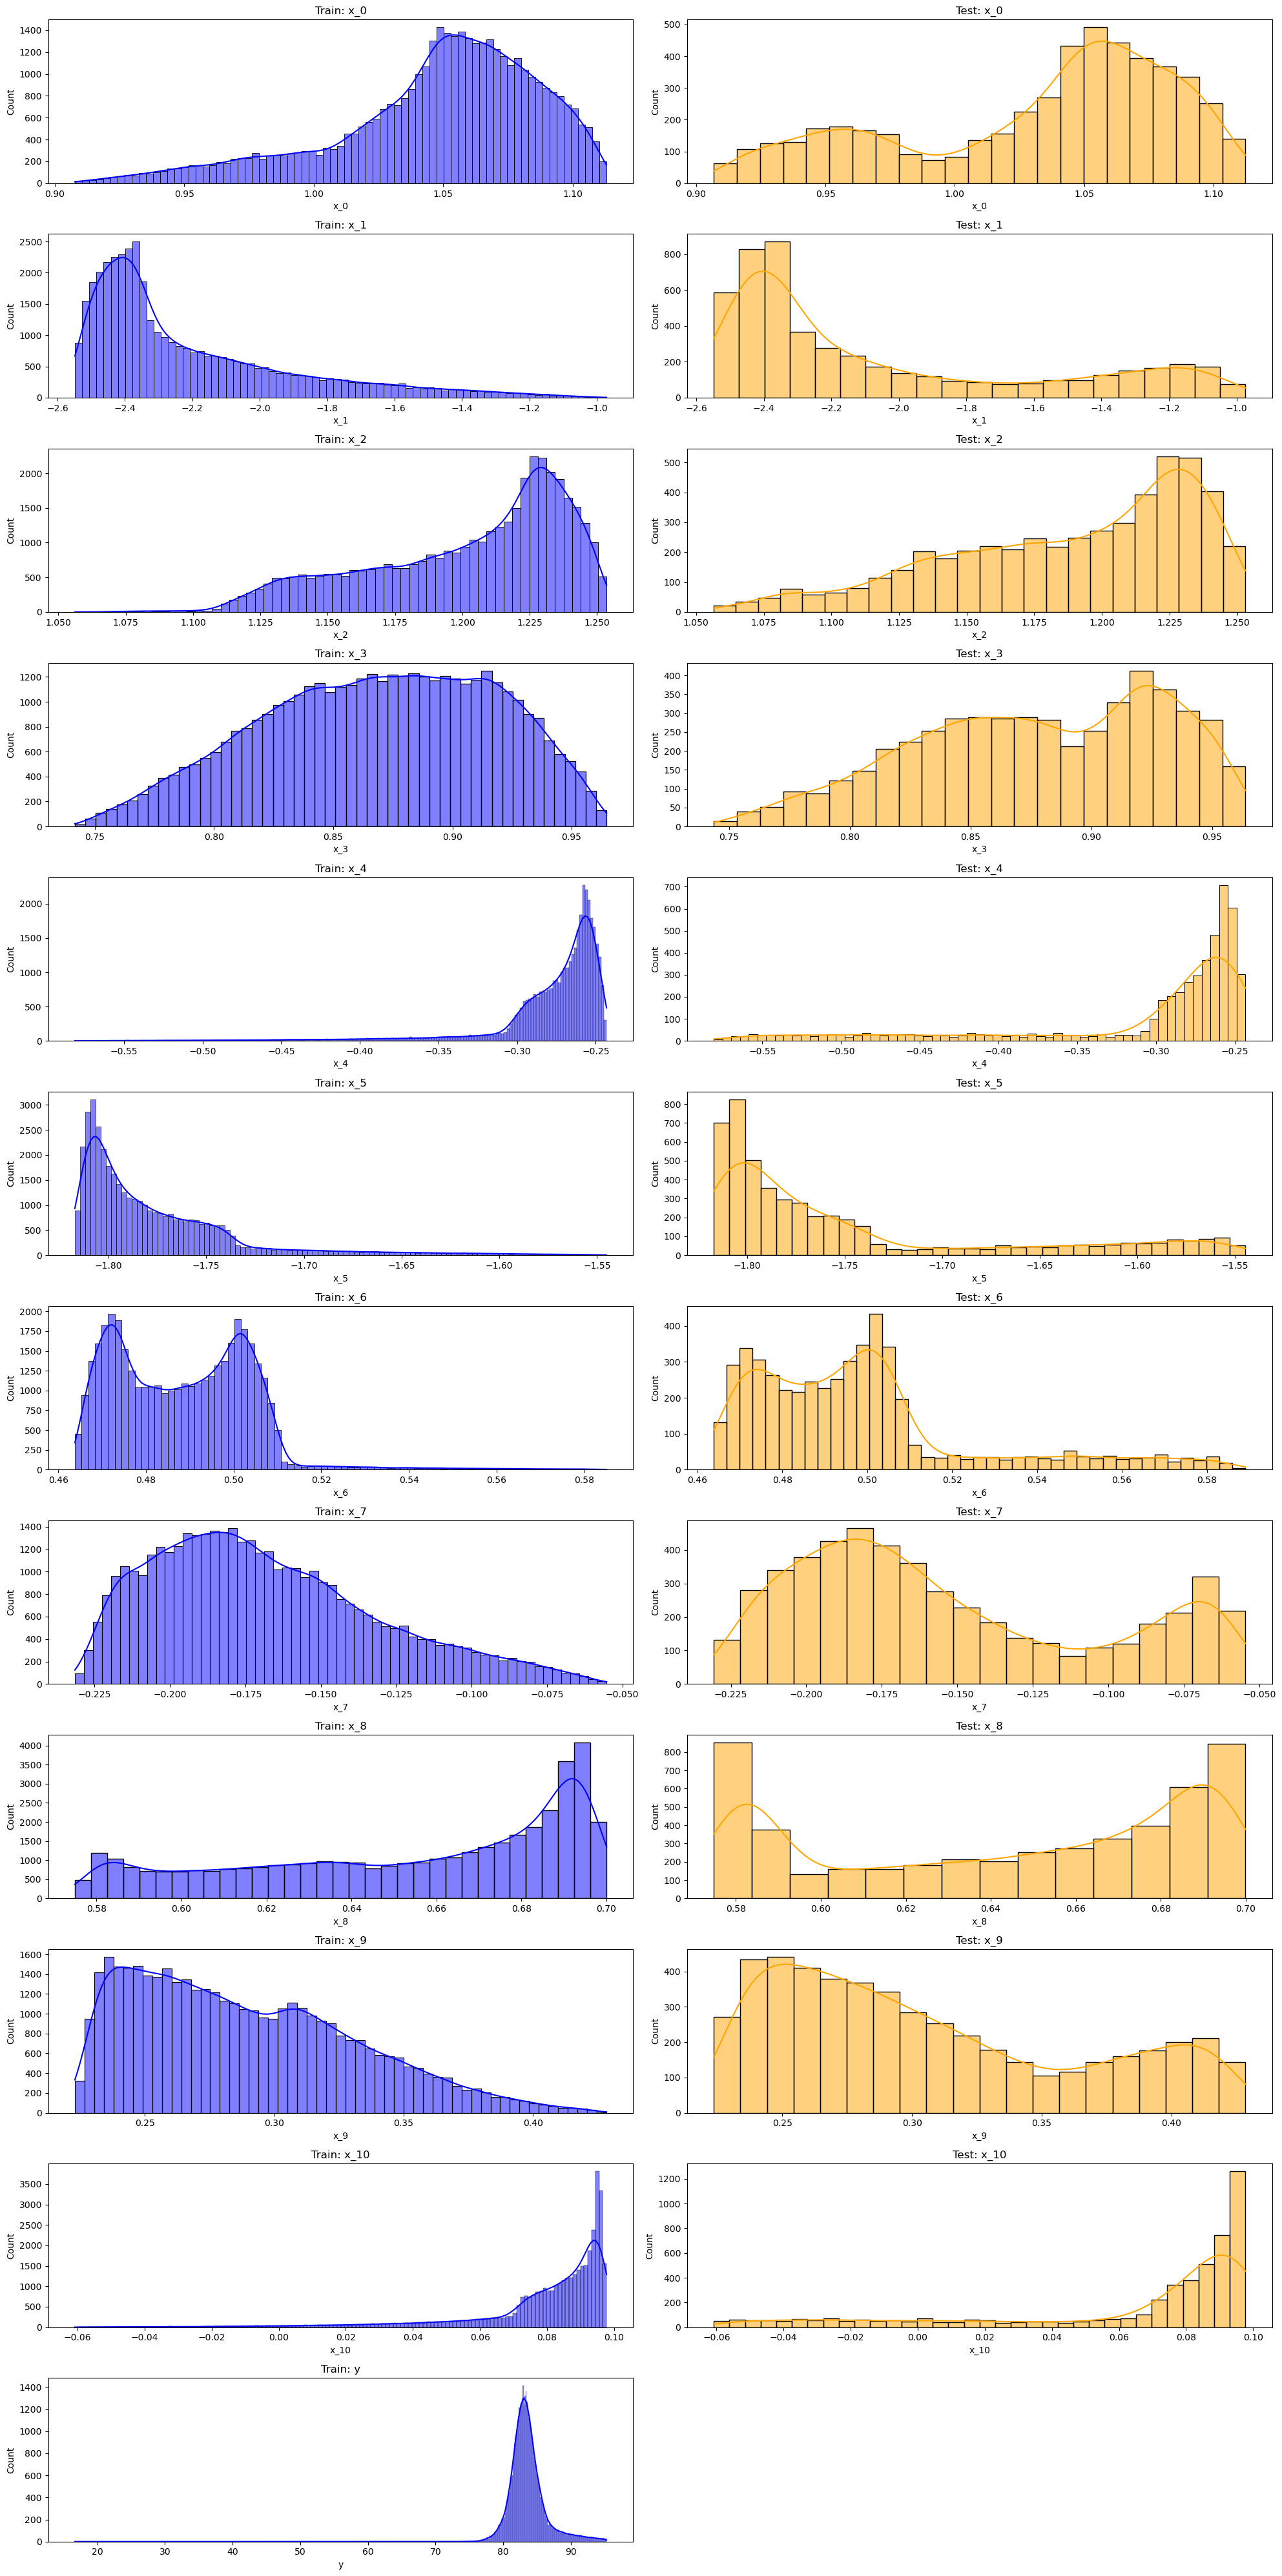

In [3]:
# Load the data
df = pd.read_csv('./train.csv')
df2 = pd.read_csv('./test.csv')

# Create histograms for each variable
fig, axes = plt.subplots(12, 2, figsize=(20, 40))  # 12x2 grid for side-by-side comparison
axes = axes.ravel()

# Plot each variable from the dataset
for i, col in enumerate(df.columns[1:]):  # Skip the ID column
    # Plot for df (train data)
    sns.histplot(df[col], ax=axes[2*i], kde=True, color='blue')
    axes[2*i].set_title(f'Train: {col}')
    
    if col != 'y':  # Exclude y from test set
        # Plot for df2 (test data)
        sns.histplot(df2[col], ax=axes[2*i + 1], kde=True, color='orange')
        axes[2*i + 1].set_title(f'Test: {col}')
    else:
        # Hide the test plot for 'y'
        axes[2*i + 1].axis('off')

plt.tight_layout()
plt.show()

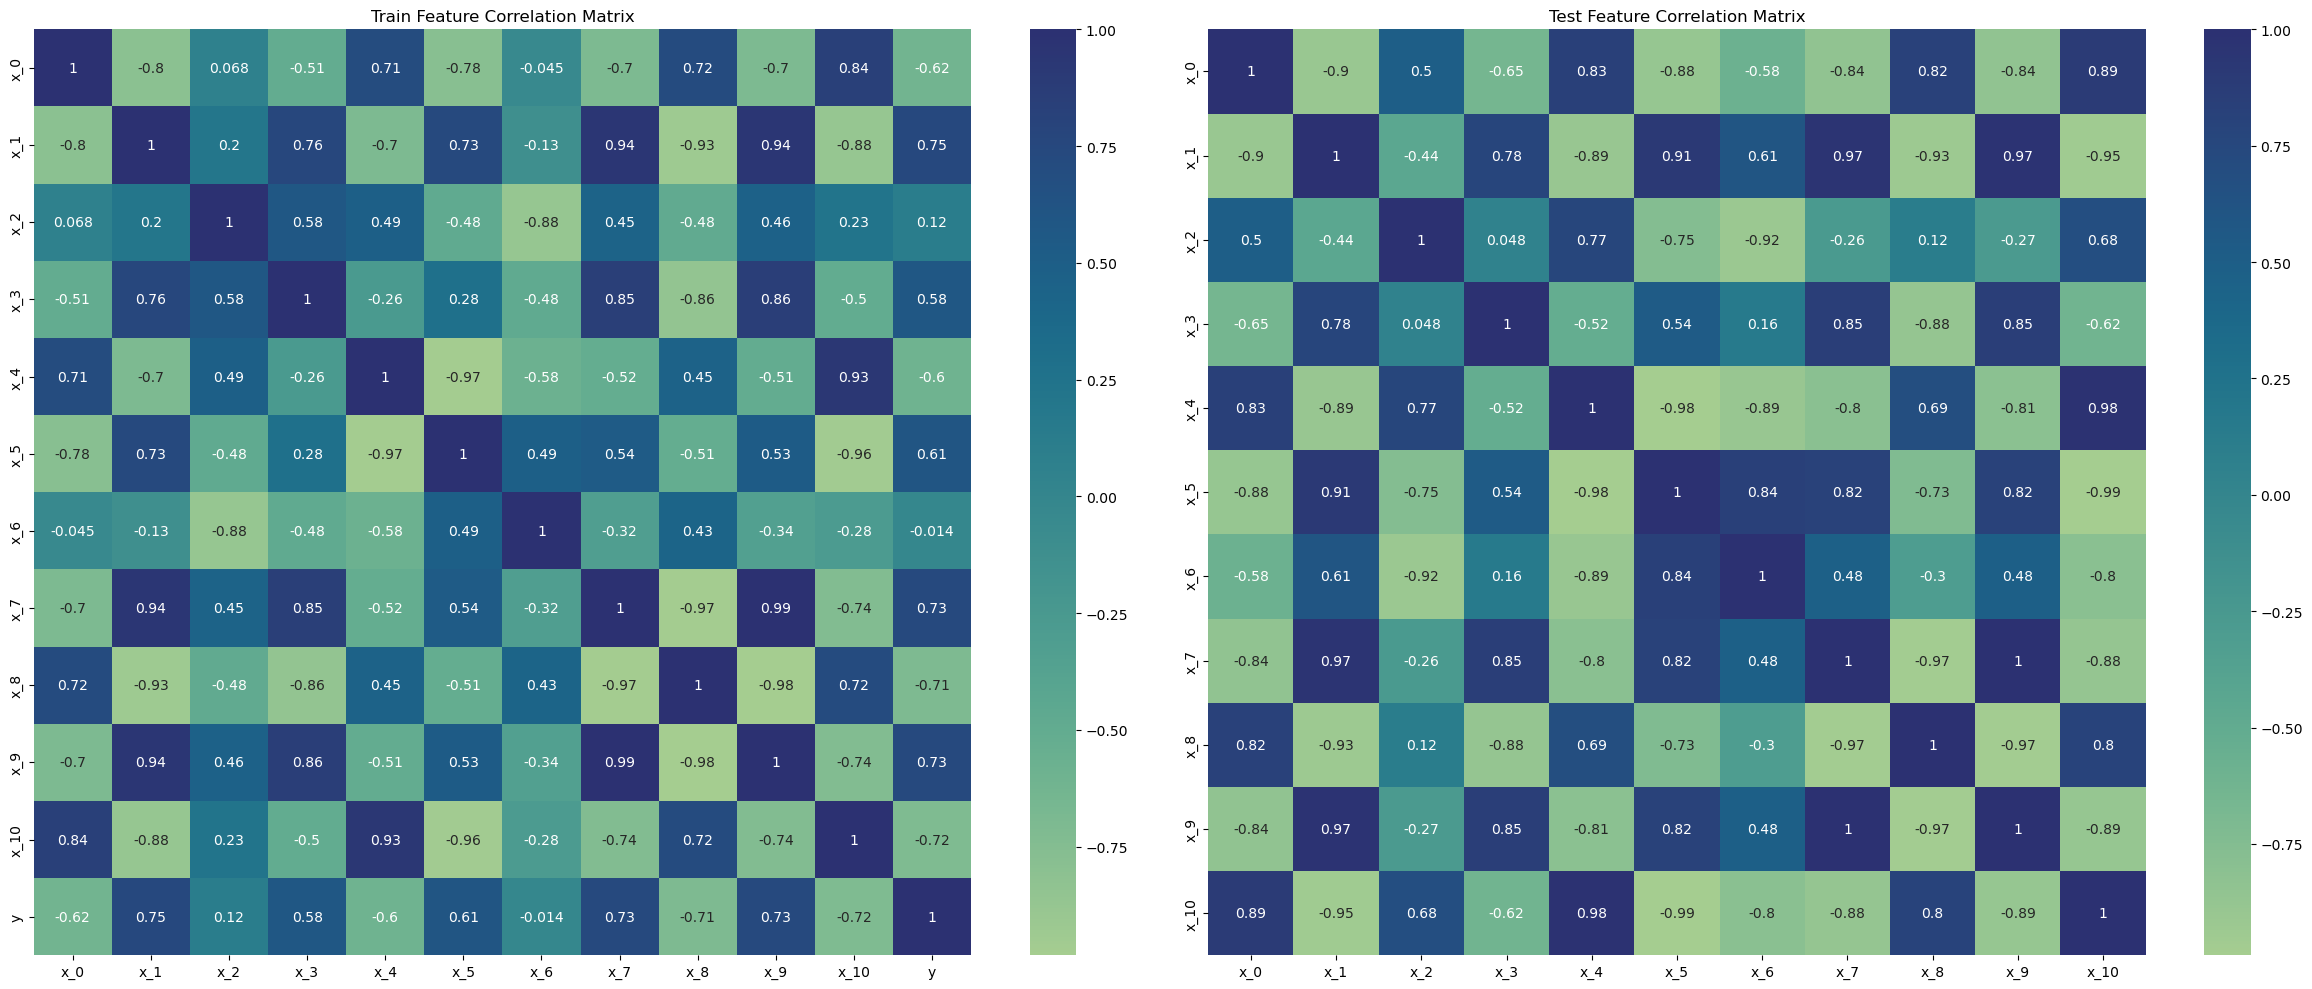

In [4]:
# Calculate correlation matrices for train and test data
correlation_matrix_train = df.iloc[:, 1:].corr()
correlation_matrix_test = df2.iloc[:, 1:].corr()

# Create side-by-side heatmaps
fig, axes = plt.subplots(1, 2, figsize=(24, 10))

# Train data correlation matrix
sns.heatmap(correlation_matrix_train, annot=True, cmap='crest', ax=axes[0])
axes[0].set_title('Train Feature Correlation Matrix')

# Test data correlation matrix
sns.heatmap(correlation_matrix_test, annot=True, cmap='crest', ax=axes[1])
axes[1].set_title('Test Feature Correlation Matrix')

plt.tight_layout()
plt.show()

## Train.csv


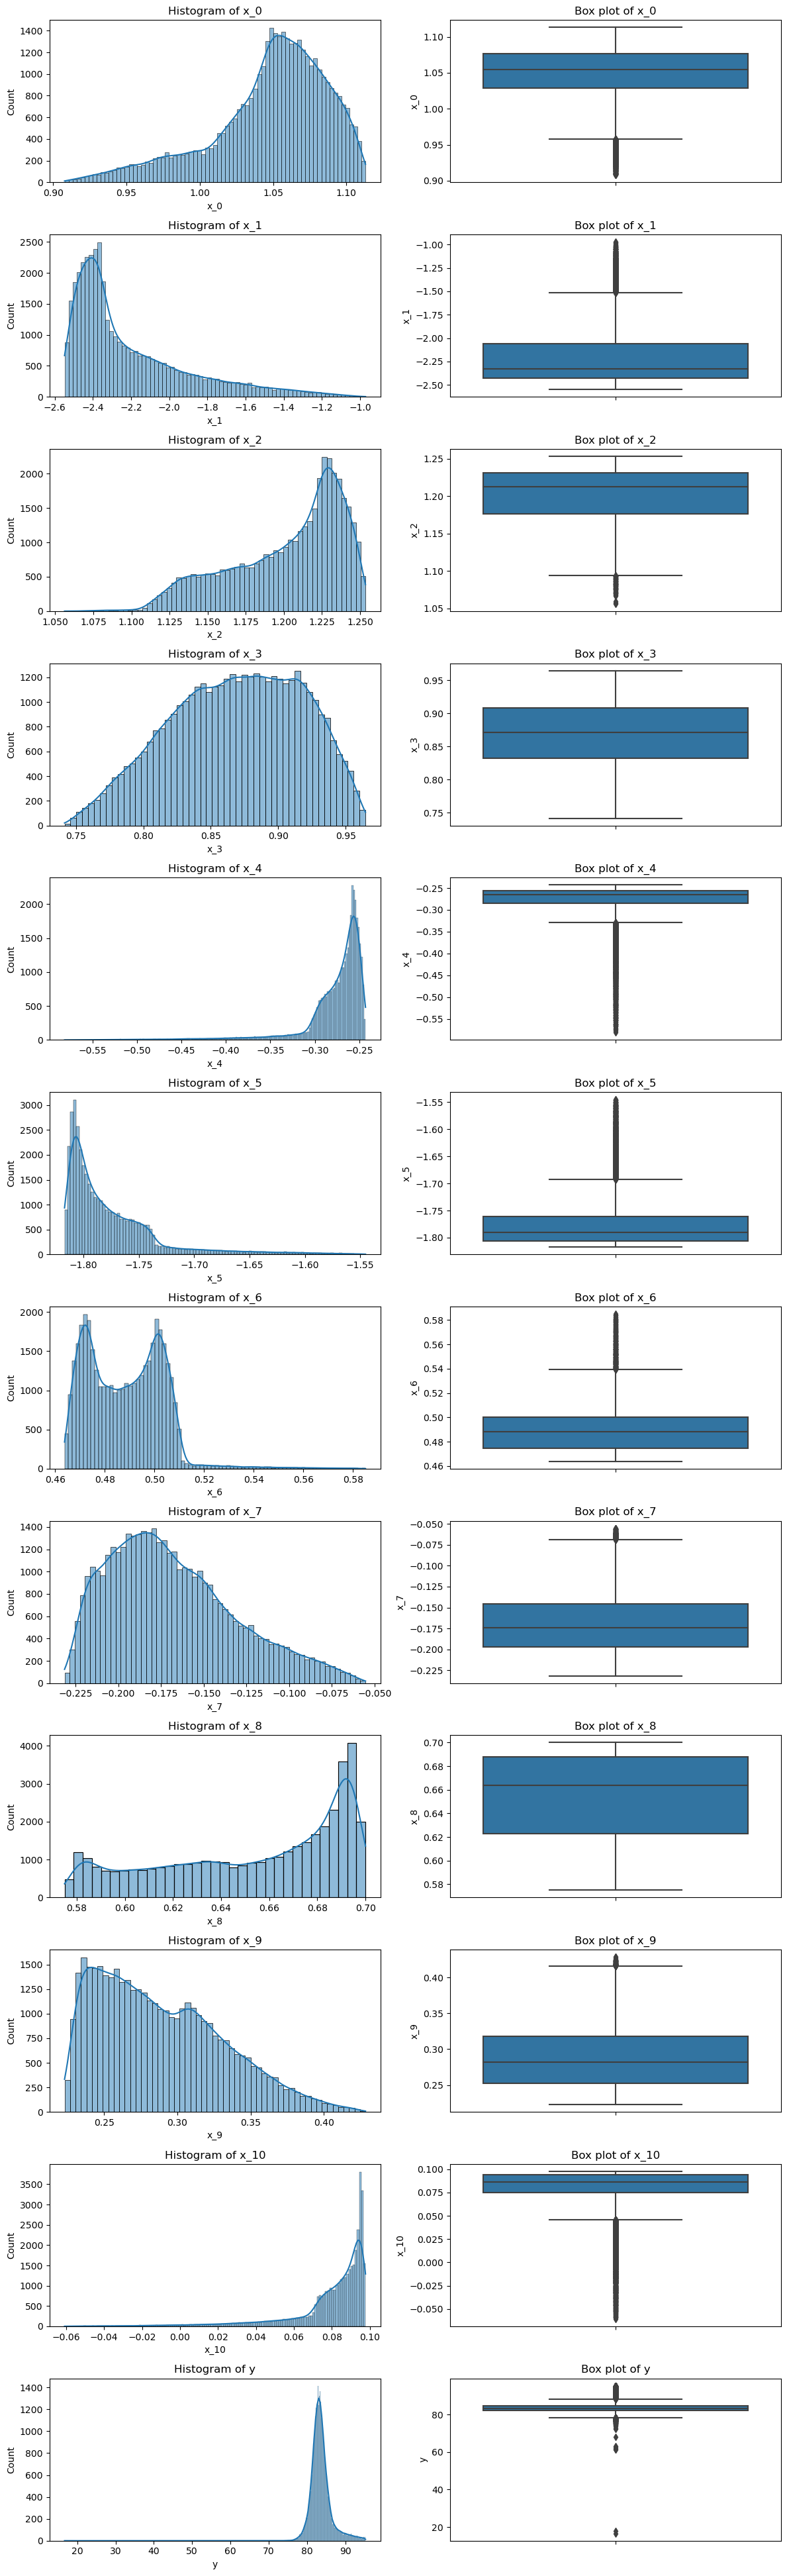

In [5]:
# Create combined plots (histogram + boxplot)
fig, axes = plt.subplots(len(df.columns) - 1, 2, figsize=(12, len(df.columns) * 3))
axes = axes.ravel()

for i, col in enumerate(df.columns[1:]):  # Skip the ID column
    # Histogram
    sns.histplot(df[col], ax=axes[2*i], kde=True)
    axes[2*i].set_title(f'Histogram of {col}')
    
    # Boxplot
    sns.boxplot(y=df[col], ax=axes[2*i + 1])
    axes[2*i + 1].set_title(f'Box plot of {col}')

plt.tight_layout()
plt.show()

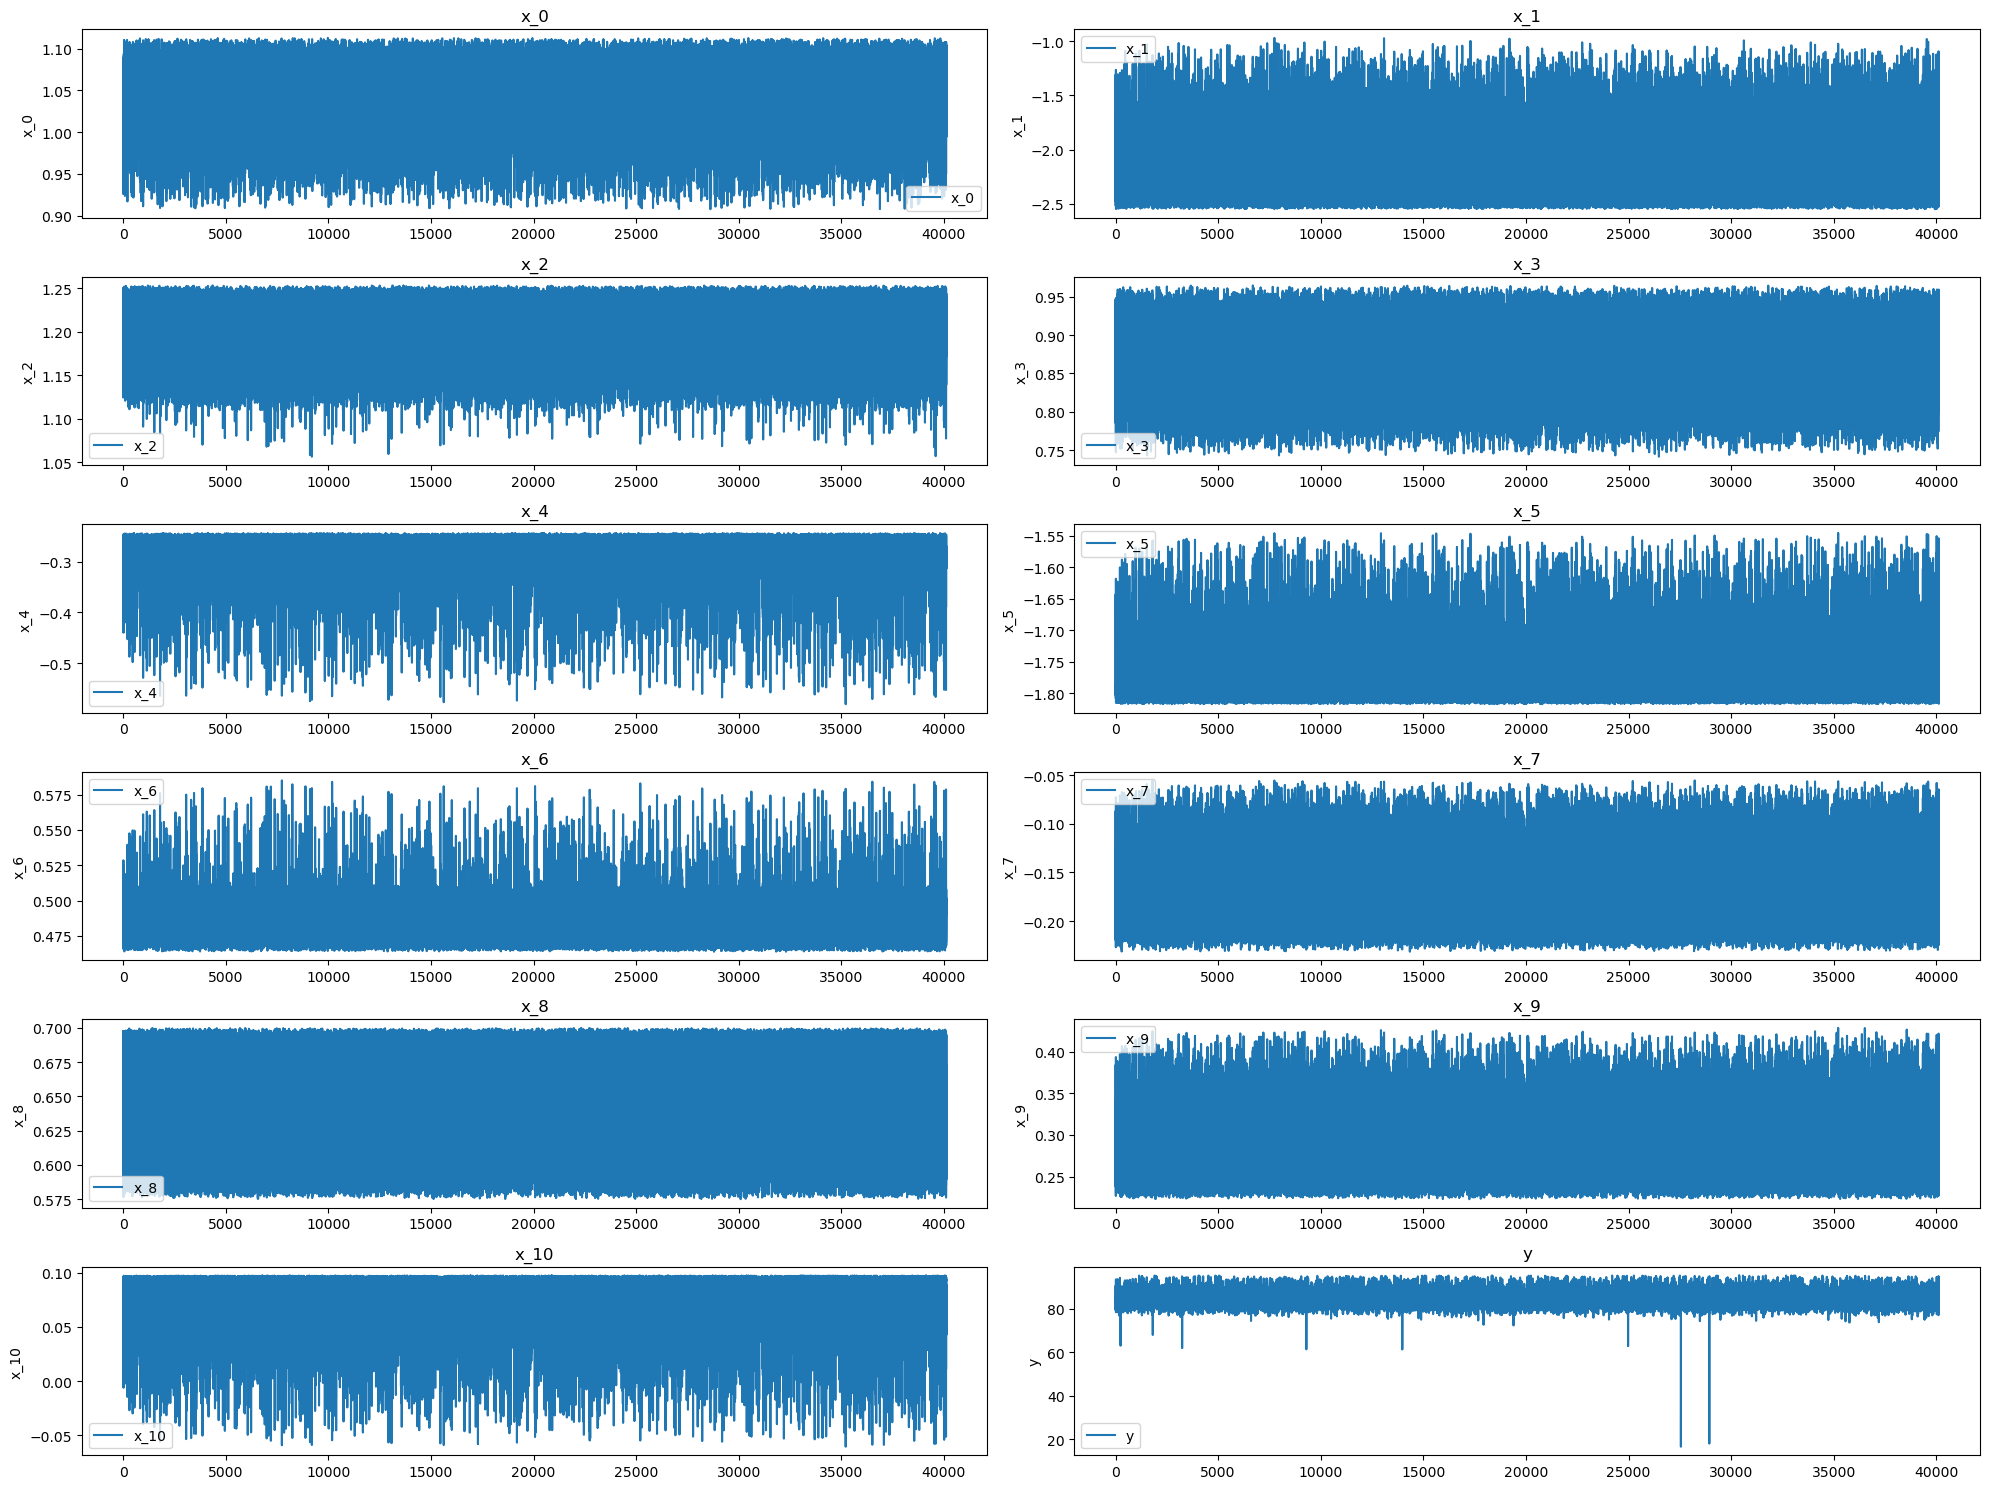

In [6]:
# Determine the number of columns and rows for the subplot grid
num_cols = 2
num_rows = 6

# Create the subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 15))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each column as a time series
for i, column in enumerate(df.columns[1:]):
    if i < len(axes):
        axes[i].plot(df.index, df[column], label=column)
        axes[i].set_title(column)
        # axes[i].set_xlabel('Date')
        axes[i].set_ylabel(column)
        axes[i].legend()

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

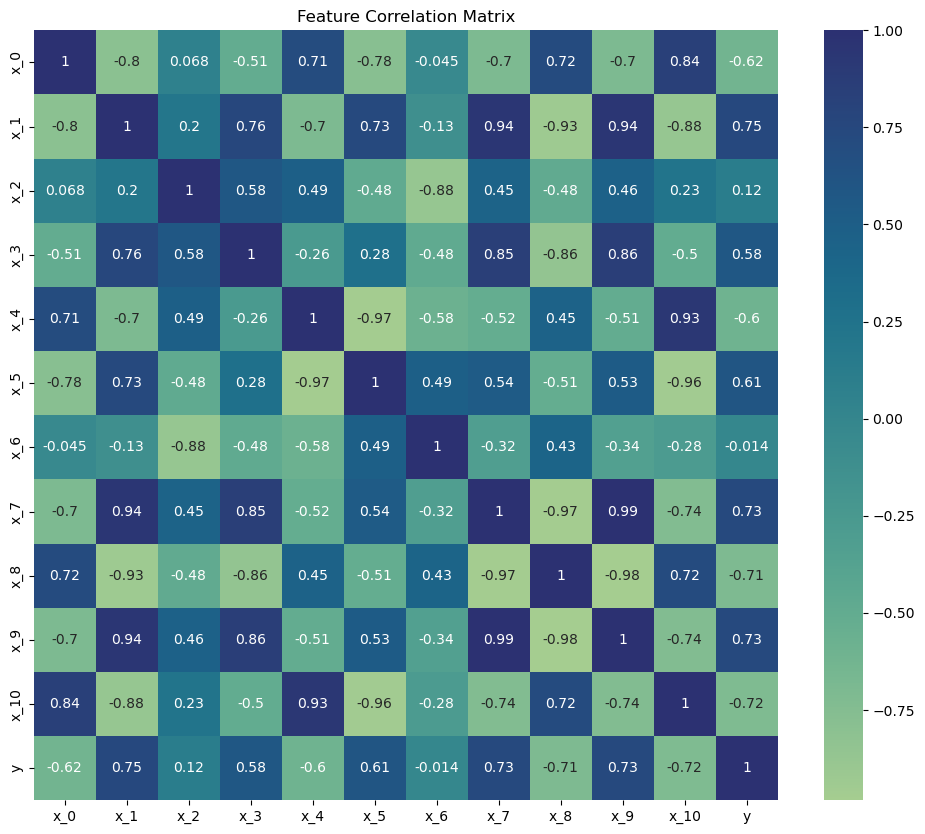

In [7]:
# Check for correlations
correlation_matrix = df.iloc[:, 1:].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='crest')
plt.title('Feature Correlation Matrix')
plt.show()

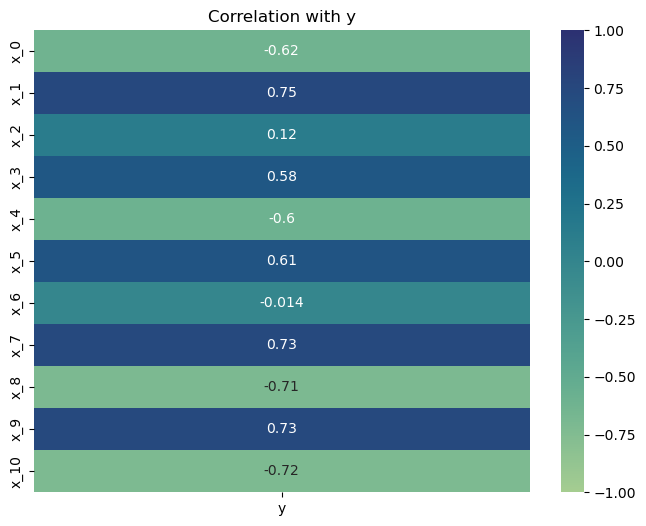

In [8]:
selected_columns = ['y', 'x_0', 'x_1', 'x_2', 'x_3', 'x_4', 'x_5', 'x_6', 'x_7', 'x_8', 'x_9', 'x_10']
correlation_matrix = df[selected_columns].corr()

correlation_with_y = correlation_matrix[['y']].drop('y')

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_with_y, annot=True, cmap='crest', vmin=-1, vmax=1)
plt.title('Correlation with y')
plt.show()

## Test.csv

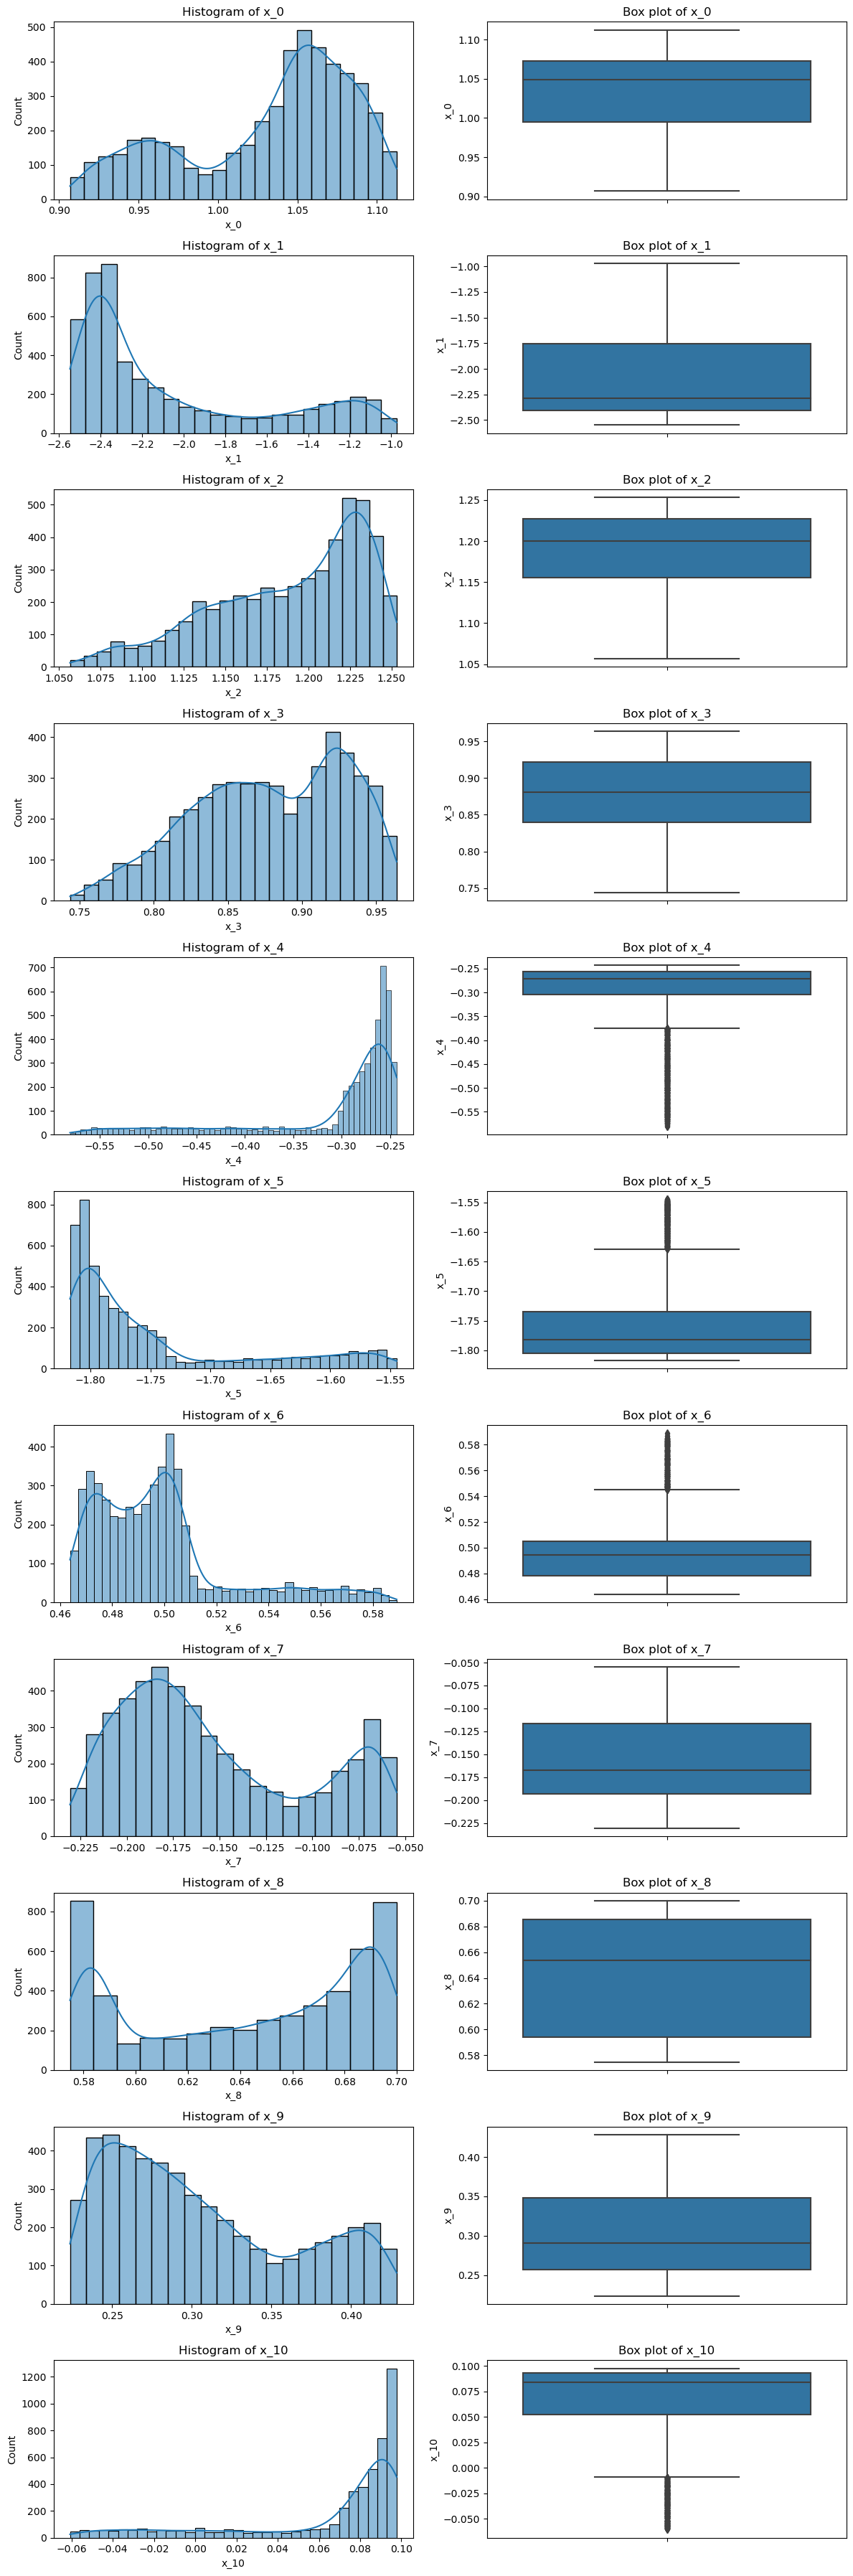

In [9]:
# Create combined plots (histogram + boxplot)
fig, axes = plt.subplots(len(df2.columns) - 1, 2, figsize=(12, len(df2.columns) * 3))
axes = axes.ravel()

for i, col in enumerate(df2.columns[1:]):  # Skip the ID column
    # Histogram
    sns.histplot(df2[col], ax=axes[2*i], kde=True)
    axes[2*i].set_title(f'Histogram of {col}')
    
    # Boxplot
    sns.boxplot(y=df2[col], ax=axes[2*i + 1])
    axes[2*i + 1].set_title(f'Box plot of {col}')

plt.tight_layout()
plt.show()

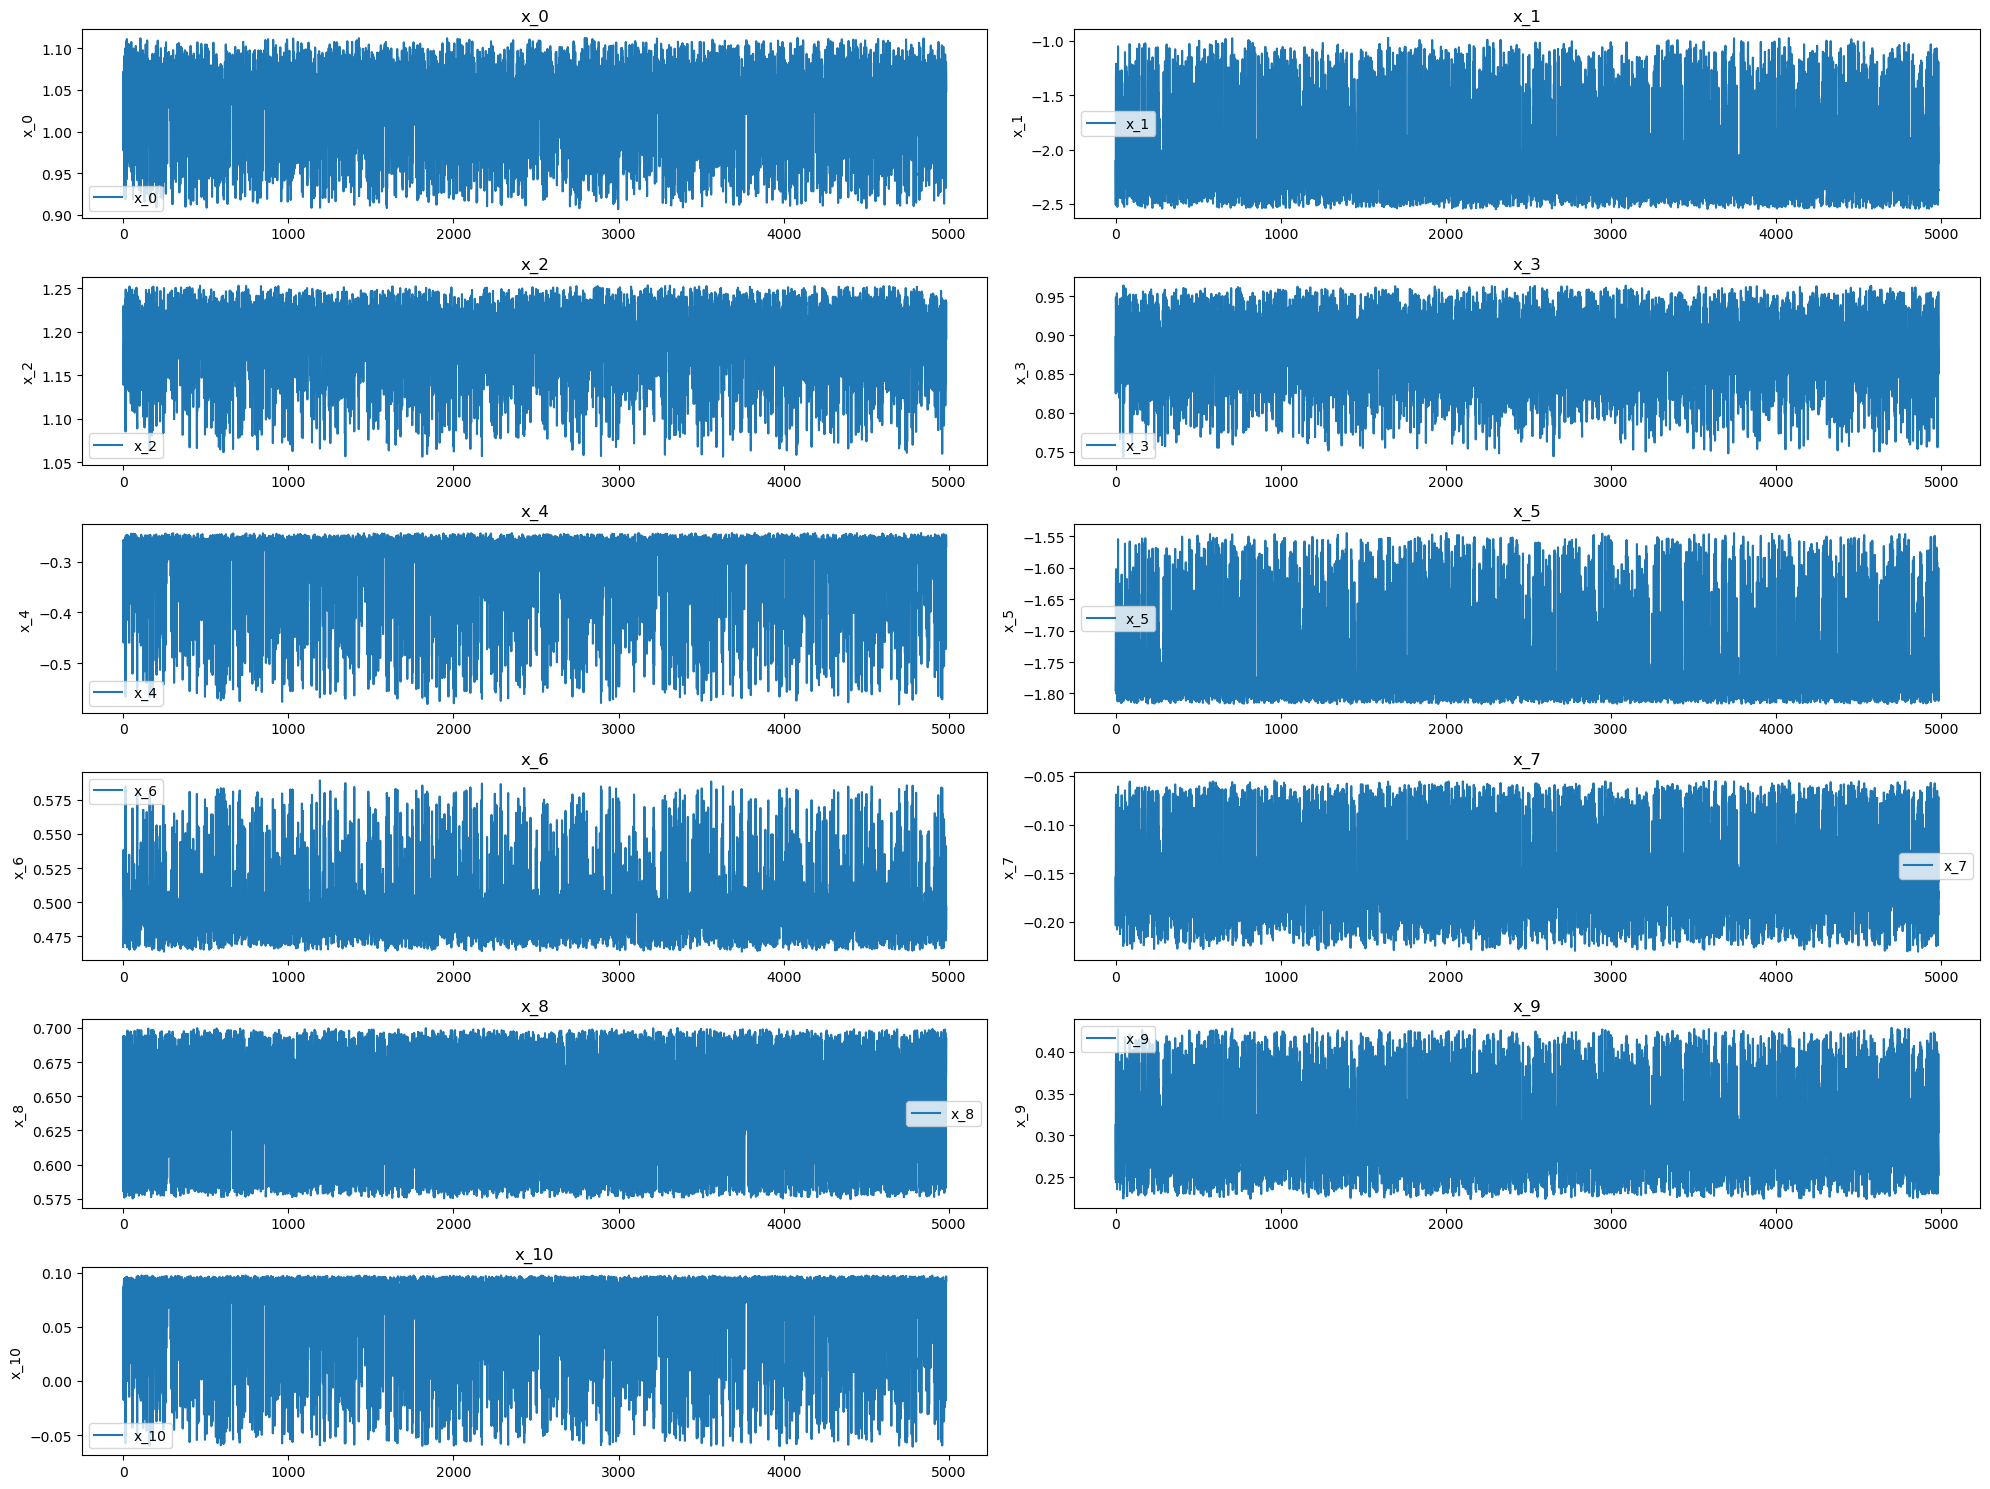

In [10]:
# Determine the number of columns and rows for the subplot grid
num_cols = 2
num_rows = 6

# Create the subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 15))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each column as a time series
for i, column in enumerate(df2.columns[1:]):
    if i < len(axes):
        axes[i].plot(df2.index, df2[column], label=column)
        axes[i].set_title(column)
        # axes[i].set_xlabel('Date')
        axes[i].set_ylabel(column)
        axes[i].legend()

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

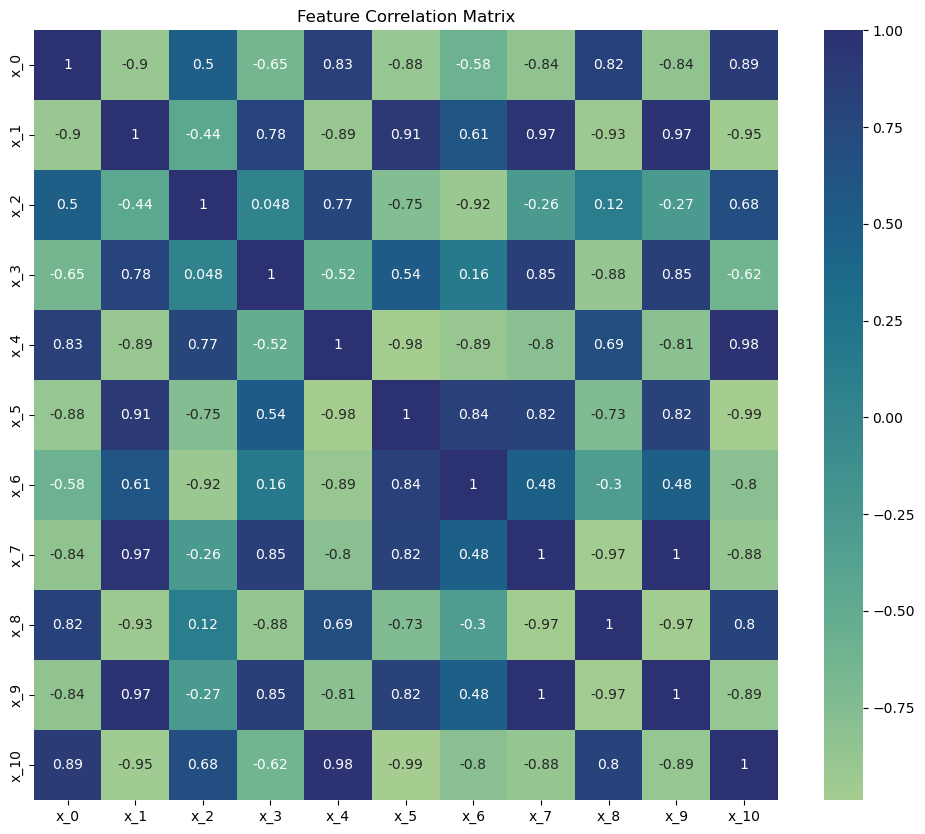

In [11]:
# Check for correlations
correlation_matrix = df2.iloc[:, 1:].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='crest')
plt.title('Feature Correlation Matrix')
plt.show()